![image](images/title.png)

# Завдання до лабораторної роботи №3  

### Хiд виконання роботи:  
1. Представити початкові дані графічно.  
2. Побудувати модель кластеризації згідно з варіантом.  
3. Виконати кластеризацію даних на основі моделі.  
4. Представити розбиття на кластери графічно, наприклад, різними кольорами.  
5. Розрахувати додаткові результати кластеризації згідно з варіантом.  
6. Побудувати декілька альтернативних моделей:  
    • шляхом зміни значень параметрів основної моделі,  
    • використати різні функції відстані,  
    • задати різні значення кількості кластерів, де кількість кластерів - параметр алгоритму.  
7. Для кожної альтернативної моделі розрахувати метрики якості кластеризації, що реалізовані в класі metrics, згідно з варіантом:  
    • Estimated Number of Clusters.  
    • Adjusted Rand index.  
    • Adjusted Mutual information.  
    • Homogeneity.  
    • Completeness.  
    • V-measure.  
    • Silhouette Coefficient.  
    • Calinski-Harabasz index.  
    • Davies-Bouldin index.  
    • Contingency Matrix.  
8. Виконати аналіз результатів кластеризації одним з неформальних методів згідно з варіантом:  
    • чи є розбиття стабільним на підвибірках даних,  
    • чи є розбиття стабільним після видалення окремих об’єктів,  
    • чи є розбиття стабільним після зміни порядку об’єктів у множині об’єктів,  
    • чи існує взаємозв’язок між результатами кластеризації і змінними, які не враховувалися при кластеризації,  
    • чи можна інтерпретувати результати кластеризації.  
9. Зробити висновки про якість роботи моделей на досліджених даних. Дослідити різні значення параметрів основної моделі, різні функції відстані та різну кількість кластерів в алгоритмах, де кількість кластерів слугує параметром.  
10. Оцінити результати кластеризації на основі метрик якості та на основі неформальних методів. Для кожного набору даних вибрати найкращу модель.  



### Варіант 5, КА-75  
Алгоритм розділу суміші expectation-maximization (EM), методи GaussianMixture та BayesianGaussianMixture класу mixture.  
Метрики якості: Homogeneity, Completeness, V-measure.  
Чи є розбиття стабільним на підвибірках даних?  

**Початкові дані:**  
*(а)* 
```python  
    np.random.seed(0)  
    n_points_per_cluster = 300  
    C1 = [-6, -2] + 0.7 * np.random.randn(n_points_per_cluster, 2)  
    C2 = [-2, 2] + 0.3 * np.random.randn(n_points_per_cluster, 2)  
    C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)  
    C4 = [4, -4] + 0.1 * np.random.randn(n_points_per_cluster, 2)  
    C5 = [5, 0] + 1.4 * np.random.randn(n_points_per_cluster, 2)  
    C6 = [5, 6] + 2.0 * np.random.randn(n_points_per_cluster, 2)  
    X = np.vstack((C1, C2, C3, C4, C5, C6))
```
    
*(б)*
```python 
    from sklearn.datasets import make_blobs  
    n_samples_1 = 1500  
    n_samples_2 = 100  
    n_samples_3 = 300  
    centers = [[0.0, 0.0], [2.0, 2.0], [−2.0, −2.0]]  
    clusters_std = [1.5, 0.5, 1.0]  
    X, y = make_blobs (n_samples=
                        [n_samples_1 , n_samples_2 , n_samples_3],
                        centers=centers,
                        cluster_std=clusters_std,
                        random_state=0, shuffle=False)
```

## Опис алгоритму

В основі ідеї EM-алгоритму лежить припущення, що досліджувана множина даних може бути змодельоване за допомогою лінійної комбінації багатовимірних нормальних розподілів, а метою є оцінка параметрів розподілу, які максимізують логарифмічну функцію правдоподібності, яка використовується для визначення якості моделі. Іншими словами, передбачається, що дані в кожному кластері підкоряються певним законом розподілу, а саме, нормальному розподілу. З урахуванням цього припущення можна визначити параметри - математичне сподівання і дисперсію, які відповідають закону розподілу елементів в кластері, найкращим чином властивому до спостережуваних даними.  
Таким чином, ми припускаємо, що будь-яке спостереження належить до всіх кластерів, але з різною ймовірністю. Тоді завдання полягатиме в "підгонці" розподілів суміші до даних, а потім у визначенні ймовірностей приналежності спостереження до кожного кластеру. Очевидно, що спостереження повинно бути віднесено до того кластеру, для якого ця можливість вище.  

*Серед переваг EM-алгоритму можна виділити наступні:*  
• Потужна статистична основа.  
• Лінійне збільшення складності при зростанні обсягу даних.  
• Стійкість до шумів і перепустками в даних.  
• Можливість побудови бажаного числа кластерів.  
• Швидка збіжність при вдалій ініціалізації.  

*Однак алгоритм має і ряд недоліків.* По-перше, припущення про нормальність всіх вимірювань даних не завжди виконується. По-друге, при невдалій ініціалізації збіжність алгоритму може виявитися досить повільним. Крім цього, алгоритм може зупинитися в локальному мінімумі і дати квазіоптимальне рішення.

Багатовимірна нормальна щільність для q-мірного вектора *x = (x1, x2, ..., xq)* може бути записана у вигляді:  
![image](images/1.png)  
де  
• ∑ - коваріаційна  матриця розміром *q × q*, яка, як відомо, є узагальненням дисперсії для багатовимірної випадкової величини,  
• μ - q-мірний вектор математичних очікувань,  
• ∣∑∣ - визначник коваріаційної матриці,  
• T - оператор транспонування.

Модель, що представляє собою суміш гауссових розподілів, задається у вигляді:  
![image](images/2.png)   
де  
• p(x∣i) - нормальний розподіл для i-го кластера,  
• wi - доля (вага) i-го кластера в початковій базі даних.

У процесі роботи алгоритму відбувається ітеративне покращення рішення, а зупинка здійснюється в момент, коли досягається необхідний рівень точності моделі. Мірою в даному випадку є статистична величина, яка монотонно збільшується. Її називають логарифмічною правдоподібністю. Метою алгоритму є оцінка середніх значень C, ковариаций R і ваг суміші W для функції розподілу ймовірності, описаної вище.

Алгоритм починає роботу з ініціалізації, тобто деякого наближеного рішення, яке може бути вибрано випадково або задано користувачем виходячи з деяких апріорних відомостей про вхідні дані. Найбільш загальним способом ініціалізації є присвоєння елементам матриці математичних очікувань випадкових значень C ← μ Random, початкова коваріаційна матриця визначається як одинична r ← I, ваги кластерів задаються однаковими (Wi ← 1/k).  

***Реалізація алгоритму:***  
*Вхід*:

    •k – кількість кластерів,  
    •Y = {y1, y2, …,yn}– множина з n спостерігань q-мірного простору,  
    •ε - допустиме відхилення для логарифмічної правдоподібності,  
    •Q - максимальна кількість ітерацій   
    
*Вихід:* C, R, W - матриці, які містять оновлювані параметри суміші.  

X - матриця з ймовірностями членства в кластерах. 
1. Ініціалізація: встановлення початкових значень C, R, W, обраних випадково або заданих користувачем.  
2. ПОКИ зміна логарифмічної правдоподібності *Δllh≥ε* та не досягнуто максимальної кількості ітерацій Q, виконувати кроки E и M.  

**Крок Е**:  
![image](images/3.png)  

**Крок M:**  
![image](images/4.png)  

Алгоритм містить два етапи: крок очікування (expectation) або Е-крок і крок максимізації (maximization) або M-крок. Кожен з них повторюється до тих пір, поки зміна логарифмічного правдоподібності Δllh не стане менше, ніж ε, або поки не буде досягнуто максимальної кількості ітерацій.  
Логарифмічна правдоподібність обчислюється як:  
![image](images/5.png)  

Змінні δ, R, P являють собою матриці, які зберігають відстань Махаланобіса, коваріації та розподіли членства в кластері для кожної з n точок. C', R', та W' є тимчасовими матрицями, які використовуються тільки для обчислень. ∣∣W∣∣ = 1. Позначення Рi, яке використане у псевдокоді, позначає k-розмірний вектор належності i-го спостерігання до кожного з k кластерів. Відповідно, Хi – нормована ймовірність приналежності до кожного з k кластерів. Стовпчик Cj матриці C є оцінкою матиматичного сподівання по j-му кластеру, R - діагональна матриця, тобто Rij=0 для всіх i≠j. З статистичної точки зору це означає, що коваріації є незалежними.

## Хід роботи  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Формуємо перший датасет

In [3]:
np.random.seed(0)
n_points_per_cluster = 300

C1 = [-6, -2] + 0.7 * np.random.randn(n_points_per_cluster, 2)
C2 = [-2, 2] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [4, -4] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C5 = [5, 0] + 1.4 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2.0 * np.random.randn(n_points_per_cluster, 2)

X1 = np.vstack((C1, C2, C3, C4, C5, C6))

Формуємо другий датасет

In [46]:
from sklearn.datasets import make_blobs  
n_samples_1 = 1500  
n_samples_2 = 100  
n_samples_3 = 300  
centers = [[0.0, 0.0], [2.0, 2.0], [-2.0, -2.0]]  
clusters_std = [1.5, 0.5, 1.0]  
X2, y2 = make_blobs(n_samples=
                  [n_samples_1 , n_samples_2 , n_samples_3],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

**Справжні кластери:**

In [84]:
labels1_true = []
labels2_true = []

for i in range(1, 7):
    labels1_true[(i-1)*n_points_per_cluster: i*n_points_per_cluster] = list(i for _ in range(n_points_per_cluster))
    
labels2_true[0: n_samples_1] = list(1 for _ in range(n_samples_1))
labels2_true[n_samples_1: n_samples_1 + n_samples_2] = list(2 for _ in range(n_samples_2))
labels2_true[n_samples_1 + n_samples_2 : ] = list(3 for _ in range(n_samples_3))

### 1. Представити початковi данi графiчно.  
На графіках зображені датасети та для кращого розуміння, де знаходяться кластери, представлено центри кожного з них.  
Так можна побачити, що у другому датасеті є "спірні" об'єкти.

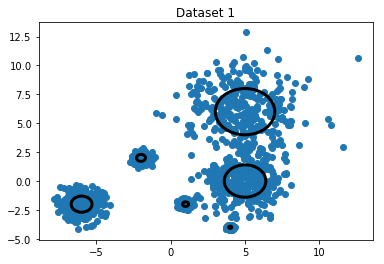

In [87]:
plt.title('Dataset 1')
plt.scatter(X1[:, 0], X1[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle([-6, -2], 0.7, fill=False, lw=3))
ax.add_artist(plt.Circle([-2, 2], 0.3, fill=False, lw=3))
ax.add_artist(plt.Circle([1, -2], 0.2, fill=False, lw=3))
ax.add_artist(plt.Circle([4, -4], 0.1, fill=False, lw=3))
ax.add_artist(plt.Circle([5, 0], 1.4, fill=False, lw=3))
ax.add_artist(plt.Circle([5, 6], 2.0, fill=False, lw=3))
plt.show()

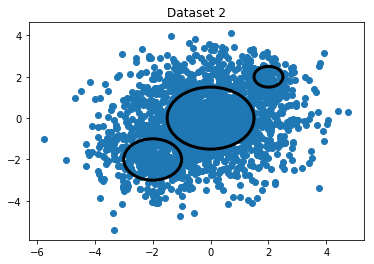

In [88]:
plt.title('Dataset 2')
plt.scatter(X2[:, 0], X2[:, 1])
ax = plt.gca()
for i in range(len(centers)):
    ax.add_artist(plt.Circle(centers[i], clusters_std[i], fill=False, lw=3))
plt.show()

### 2. Побудувати модель кластеризації згідно з варіантом.  
***(а)*** За допомогою графіка можна побачити, що у пешому датасеті майже немає "спірних" об'єктів. Ці об'єкти кластеру на графіку утворють круги, тому виберемо для побудови моделей `covariance_type="spherical"`. Вони будуть простішими, але швидша, тобто вони не будуть обчислювально дорогими.

In [5]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

gmm1 = GaussianMixture(n_components=6, covariance_type="spherical", max_iter=500)
bgm1 = BayesianGaussianMixture(n_components=6, covariance_type="spherical", max_iter=500)

***(б)*** У другому датасеті всі об'єкти спірні, тому для побудов моделей виберемо `covariance_type="full"`. Хоча вони обчислювально дорогі, але дають більшу точність.  

In [77]:
gmm2 = GaussianMixture(n_components=3, covariance_type="full", max_iter=1000)
bgm2 = BayesianGaussianMixture(
    n_components=3, 
    covariance_type="full", 
    max_iter=10000, 
    init_params='random', 
    weight_concentration_prior=0.01
)

### 3. Виконати кластеризацію даних на основі моделі.  


In [7]:
labels1_gmm = gmm1.fit(X1).predict(X1)

In [8]:
labels1_bgm = bgm1.fit(X1).predict(X1)

In [48]:
labels2_gmm = gmm2.fit(X2).predict(X2)

In [78]:
labels2_bgm = bgm2.fit(X2).predict(X2)

### 4. Представити розбиття на кластери графічно, наприклад, різними кольорами.

Справжні кластери першого датасету

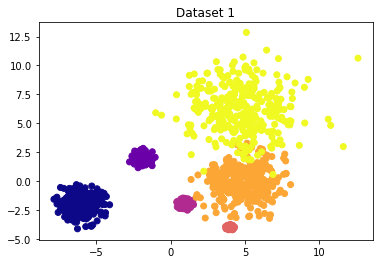

In [91]:
plt.title('Dataset 1')
plt.scatter(X1[:, 0], X1[:, 1], c=labels1_true, cmap='plasma')
plt.show()

Отримані результати першого датасету

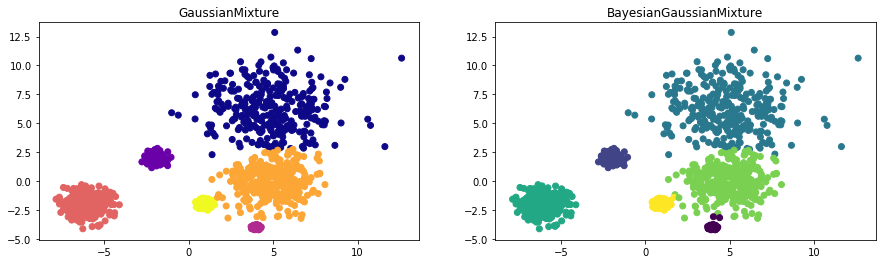

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.set_title('GaussianMixture')
ax2.set_title('BayesianGaussianMixture')
ax1.scatter(X1[:, 0], X1[:, 1], c=labels1_gmm, cmap='plasma')
ax2.scatter(X1[:, 0], X1[:, 1], c=labels1_bgm, cmap='viridis')
plt.show()

Справжні кластери другого датасету

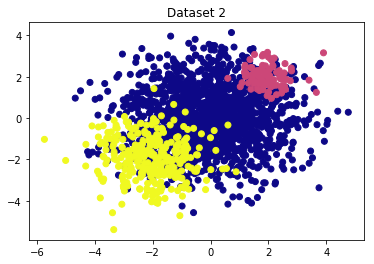

In [92]:
plt.title('Dataset 2')
plt.scatter(X2[:, 0], X2[:, 1], c=labels2_true, cmap='plasma')
plt.show()

Отримані кластери другого датасету

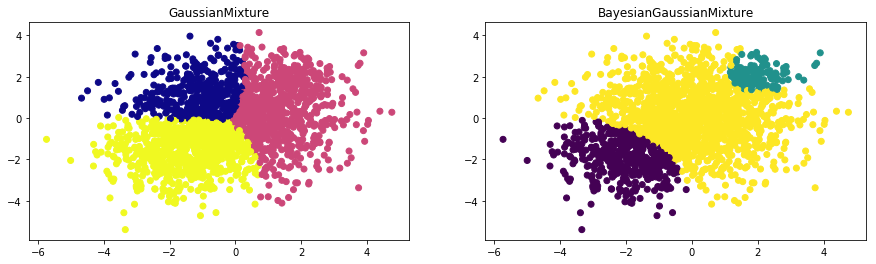

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.set_title('GaussianMixture')
ax2.set_title('BayesianGaussianMixture')
ax1.scatter(X2[:, 0], X2[:, 1], c=labels2_gmm, cmap='plasma')
ax2.scatter(X2[:, 0], X2[:, 1], c=labels2_bgm, cmap='viridis')
plt.show()

### 6. Побудувати декілька альтернативних моделей:   

#### • шляхом зміни значень параметрів основної моделі

#####  а) Перший датасет

Розглянемо GaussianMixture. Змінимо `init_params` з `kmeans` на `random`. Від цього параметру буде залежити, як ініціалізуються ваги, середні (means) та точність (precisions). Для першого випадку виберемо `covariance_type='spherical'`, а для другого - `covariance_type='full'`.

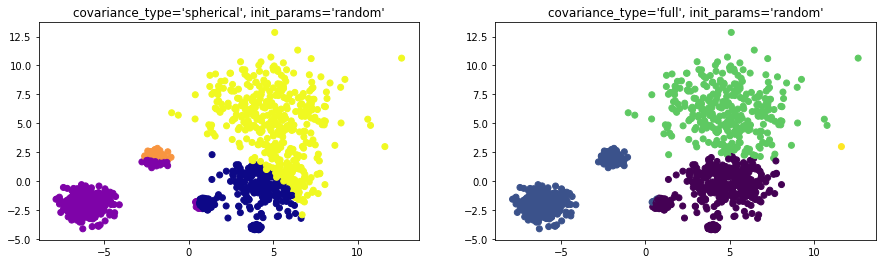

In [252]:
# gmm1 = GaussianMixture(n_components=6, covariance_type="spherical", max_iter=500) - початкова модель

gmm1_11 = GaussianMixture(n_components=6, covariance_type="spherical", max_iter=500, init_params='random')
gmm1_12 = GaussianMixture(n_components=6, covariance_type="full", max_iter=500, init_params='random')

labels1_gmm_11 = gmm1_11.fit(X1).predict(X1)
labels1_gmm_12 = gmm1_12.fit(X1).predict(X1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.set_title("covariance_type='spherical', init_params='random'")
ax2.set_title("covariance_type='full', init_params='random'")
ax1.scatter(X1[:, 0], X1[:, 1], c=labels1_gmm_11, cmap='plasma')
ax2.scatter(X1[:, 0], X1[:, 1], c=labels1_gmm_12, cmap='viridis')
plt.show()

Як видно з обох графіків, кластеризація спрацювала гірше при `init_params='random'`. Це пов'язано з тим, що кластери відокремлені один від одного і алгоритм `kmeans` кластеризує краще у такому випадку.  Зміна параметру `max_iter` (максимальна кількість ітерацій) на дала покращення.

Розглянемо BayesianGaussianMixture.  
1) У першій моделі змінимо `weight_concentration_prior_type` на `dirichlet_distribution` (`init_params = 'kmeans'`)  
2) У другій - змінимо `weight_concentration_prior_type` на `dirichlet_distribution`, `init_params` - на `random`.  
3) У третій - змінимо `weight_concentration_prior_type` на `dirichlet_process`, `init_params` - на `random`.

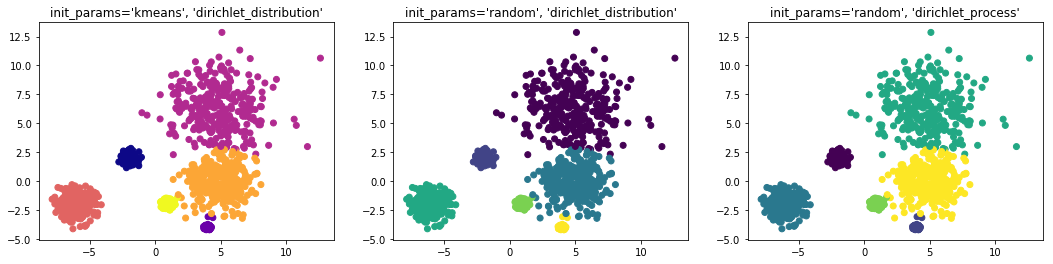

In [275]:
#bgm1 = BayesianGaussianMixture(n_components=6, covariance_type="spherical", max_iter=500) - початкова модель

bgm1_11 = BayesianGaussianMixture(
    n_components=6, covariance_type="spherical", max_iter=500,
    weight_concentration_prior_type='dirichlet_distribution'
    )
bgm1_12 = BayesianGaussianMixture(
    n_components=6, covariance_type="spherical", max_iter=500,
    weight_concentration_prior_type='dirichlet_distribution',
    init_params='random'
    )
bgm1_13 = BayesianGaussianMixture(
    n_components=6, covariance_type="spherical", max_iter=500,
    weight_concentration_prior_type='dirichlet_process',
    init_params='random'
    )

labels1_bgm_11 = bgm1_11.fit(X1).predict(X1)
labels1_bgm_12 = bgm1_12.fit(X1).predict(X1)
labels1_bgm_13 = bgm1_13.fit(X1).predict(X1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
ax1.set_title("init_params='kmeans', 'dirichlet_distribution'")
ax2.set_title("init_params='random', 'dirichlet_distribution'")
ax3.set_title("init_params='random', 'dirichlet_process'")
ax1.scatter(X1[:, 0], X1[:, 1], c=labels1_bgm_11, cmap='plasma')
ax2.scatter(X1[:, 0], X1[:, 1], c=labels1_bgm_12, cmap='viridis')
ax3.scatter(X1[:, 0], X1[:, 1], c=labels1_bgm_13, cmap='viridis')
plt.show()

Як видно з графіків, результат кластеризації залишився однаковим. Зміна параметрів не вплинула на це.

#####  б) Другий датасет

Розглянемо GaussianMixture. Змінимо `init_params` з `kmeans` на `random` та збільшемо максимальну кількість ітерацій з 1000 до 5000.

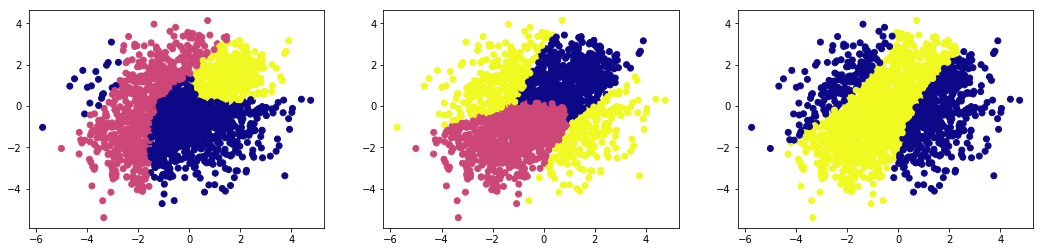

In [298]:
#gmm2 = GaussianMixture(n_components=3, covariance_type="full", max_iter=1000) - початкова модель

gmm2_1 = GaussianMixture(n_components=3, covariance_type="full", max_iter=5000, init_params='random')

labels2_gmm_11 = gmm2_1.fit(X2).predict(X2)
labels2_gmm_12 = gmm2_1.fit(X2).predict(X2)
labels2_gmm_13 = gmm2_1.fit(X2).predict(X2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
ax1.scatter(X2[:, 0], X2[:, 1], c=labels2_gmm_11, cmap='plasma')
ax2.scatter(X2[:, 0], X2[:, 1], c=labels2_gmm_12, cmap='plasma')
ax3.scatter(X2[:, 0], X2[:, 1], c=labels2_gmm_13, cmap='plasma')
plt.show()

Модель дає різний результат при однакових параметрах. Тому параметр `init_params='random'` не треба використовувати у даній моделі.

Розглянемо BayesianGaussianMixture.  
Розглянемо, як залежить результат кластеризації від параметру `weight_concentration_prior`. Побудуємо 4 моделі:  
1) Модель з параметрами `weight_concentration_prior = 1. / n_components` (за замовчуванням)  
2) Модель з параметрами `weight_concentration_prior = 0.01`  
3) Модель з параметрами `weight_concentration_prior = 1`  
4) Модель з параметрами `weight_concentration_prior = 1000`  

In [87]:
#bgm2 = BayesianGaussianMixture(
#     n_components=3, covariance_type="full", max_iter=10000, 
#     init_params='random', weight_concentration_prior=0.01) - початкова модель

bgm2_11 = BayesianGaussianMixture(
    n_components=3, covariance_type="full", max_iter=10000,
    init_params='random'
    )
bgm2_12 = BayesianGaussianMixture(
    n_components=3, covariance_type="full", max_iter=10000,
    init_params='random', weight_concentration_prior=0.01
    )
bgm2_13 = BayesianGaussianMixture(
    n_components=3, covariance_type="full", max_iter=10000,
    init_params='random', weight_concentration_prior=1
    )
bgm2_14 = BayesianGaussianMixture(
    n_components=3, covariance_type="full", max_iter=10000,
    init_params='random', weight_concentration_prior=1000
    )

labels2_bgm_11 = bgm2_11.fit(X2).predict(X2)
labels2_bgm_12 = bgm2_12.fit(X2).predict(X2)
labels2_bgm_13 = bgm2_13.fit(X2).predict(X2)
labels2_bgm_14 = bgm2_14.fit(X2).predict(X2)

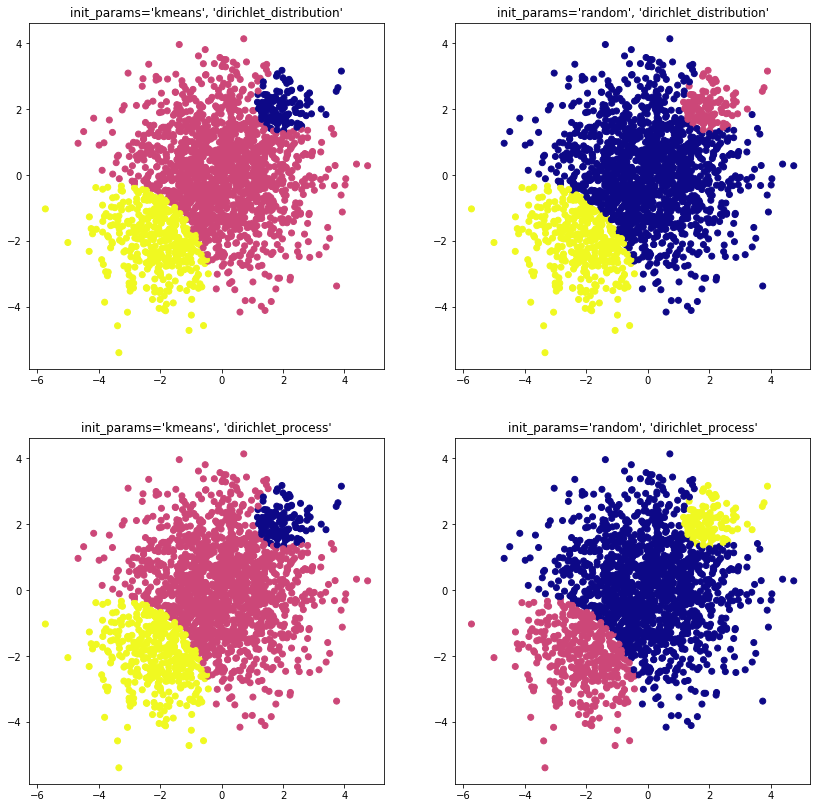

In [88]:
fig, a = plt.subplots(2, 2, figsize=(14,14))
a[0][0].set_title("init_params='kmeans', 'dirichlet_distribution'")
a[0][1].set_title("init_params='random', 'dirichlet_distribution'")
a[1][0].set_title("init_params='kmeans', 'dirichlet_process'")
a[1][1].set_title("init_params='random', 'dirichlet_process'")
a[0][0].scatter(X2[:, 0], X2[:, 1], c=labels2_bgm_11, cmap='plasma')
a[0][1].scatter(X2[:, 0], X2[:, 1], c=labels2_bgm_12, cmap='plasma')
a[1][0].scatter(X2[:, 0], X2[:, 1], c=labels2_bgm_13, cmap='plasma')
a[1][1].scatter(X2[:, 0], X2[:, 1], c=labels2_bgm_14, cmap='plasma')
plt.show()

In [89]:
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score

hs_1 = homogeneity_score(labels2_true, labels2_bgm_11)
hs_2 = homogeneity_score(labels2_true, labels2_bgm_12)
hs_3 = homogeneity_score(labels2_true, labels2_bgm_13)
hs_4 = homogeneity_score(labels2_true, labels2_bgm_14)

cs_1 = completeness_score(labels2_true, labels2_bgm_11)
cs_2 = completeness_score(labels2_true, labels2_bgm_12)
cs_3 = completeness_score(labels2_true, labels2_bgm_13)
cs_4 = completeness_score(labels2_true, labels2_bgm_14)

vm_1 = v_measure_score(labels2_true, labels2_bgm_11)
vm_2 = v_measure_score(labels2_true, labels2_bgm_12)
vm_3 = v_measure_score(labels2_true, labels2_bgm_13)
vm_4 = v_measure_score(labels2_true, labels2_bgm_14)

print('Homogenity score:')
print('hs1:\t', hs_1, '\ths2:\t', hs_2, '\ths3:\t', hs_3,'\ths4:\t', hs_4)

print('\nCompleteness score:')
print('cs1:\t', cs_1, '\tcs2:\t', cs_2, '\tcs3:\t', cs_3,'\tcs4:\t', cs_4)

print('\nV-measure score:')
print('vm1:\t', vm_1, '\tvm2:\t', vm_2, '\tvm3:\t', vm_3,'\tvm4:\t', vm_4)

Homogenity score:
hs1:	 0.47291826842769014 	hs2:	 0.4535420811293295 	hs3:	 0.47291826842769014 	hs4:	 0.46281758816915625

Completeness score:
cs1:	 0.410842483349627 	cs2:	 0.402959240871513 	cs3:	 0.410842483349627 	cs4:	 0.3991134100957651

V-measure score:
vm1:	 0.43970025921946476 	vm2:	 0.4267570125594763 	vm3:	 0.43970025921946476 	vm4:	 0.42861135343392126


З метрик якості випливає, що для даної моделі найкращий результат дає значення параметру за замовчуванням. Цей параметр регулює кількість компонент, які використовуються для "підлаштування" (fit). 

##### • задати різні значення кількості кластерів, де кількість кластерів - параметр алгоритму.

#####  а) Перший датасет   

Змінимо кількість кластерів від 3 до 8 та побудуємо графіки з отриманими кластерами.

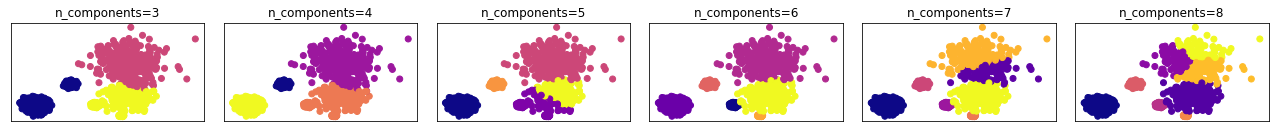

In [25]:
# gmm1 = GaussianMixture(n_components=6, covariance_type="spherical", max_iter=500) - початкова модель

fig = plt.figure(figsize=(50, 30))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

for n_components in range(3, 9):
    gmm1_2 = GaussianMixture(n_components=n_components, covariance_type="spherical", max_iter=500)

    labels1_gmm_2 = gmm1_2.fit(X1).predict(X1)

    ax = fig.add_subplot(20, 17, n_components, xticks=[], yticks=[])
    ax.set_title(f"n_components={n_components}")
    ax.scatter(X1[:, 0], X1[:, 1], c=labels1_gmm_2, cmap='plasma')

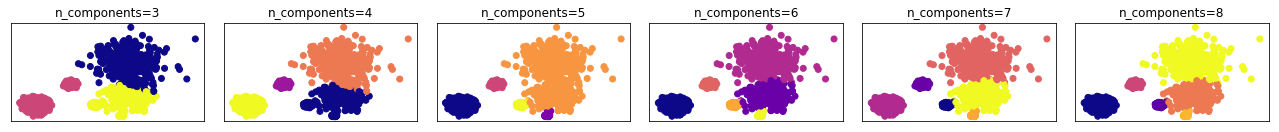

In [26]:
#bgm1 = BayesianGaussianMixture(n_components=6, covariance_type="spherical", max_iter=500) - початкова модель

fig = plt.figure(figsize=(50, 30))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

for n_components in range(3, 9):
    bgm1_2 = BayesianGaussianMixture(n_components=n_components, covariance_type="spherical", max_iter=500)

    labels1_bgm_2 = bgm1_2.fit(X1).predict(X1)

    ax = fig.add_subplot(20, 17, n_components, xticks=[], yticks=[])
    ax.set_title(f"n_components={n_components}")
    ax.scatter(X1[:, 0], X1[:, 1], c=labels1_bgm_2, cmap='plasma')

Порівнюючи отримані графіки, можна побачити, що у методі GaussianMixture при збільшені кількості кластерів у параметрах, було представлена відповідна їхня кількість. А у методі BayesianGaussianMixture максимальна кількість кластерів залишилась 6.

#####  б) Другий датасет   

Змінимо кількість кластерів від 1 до 5 та побудуємо графіки з отриманими кластерами.

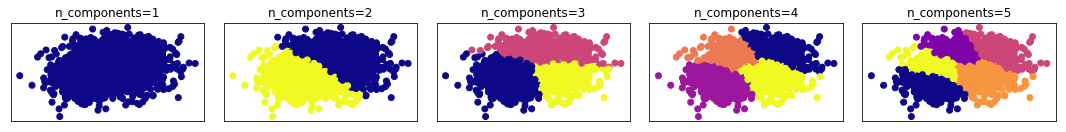

In [28]:
# gmm2 = GaussianMixture(n_components=3, covariance_type="full", max_iter=1000) - початкова модель

fig = plt.figure(figsize=(50, 30))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

for n_components in range(1, 6):
    gmm2_2 = GaussianMixture(n_components=n_components, covariance_type="full", max_iter=1000)

    labels2_gmm_2 = gmm2_2.fit(X2).predict(X2)

    ax = fig.add_subplot(20, 17, n_components, xticks=[], yticks=[])
    ax.set_title(f"n_components={n_components}")
    ax.scatter(X2[:, 0], X2[:, 1], c=labels2_gmm_2, cmap='plasma')

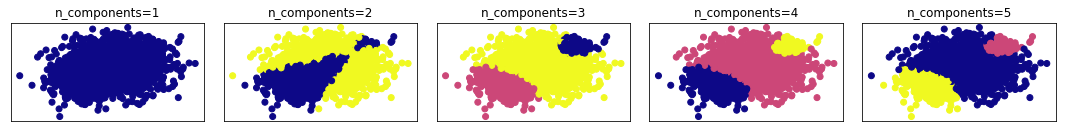

In [81]:
#bgm2 = BayesianGaussianMixture(n_components=3, covariance_type="full", 
#                     max_iter=10000, init_params='random', weight_concentration_prior=0.01) - початкова модель

fig = plt.figure(figsize=(50, 30))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

for n_components in range(1, 6):
    bgm2_2 = BayesianGaussianMixture(
        n_components=n_components, 
        covariance_type="full", 
        max_iter=10000, 
        init_params='random', 
        weight_concentration_prior=0.01
    )

    labels2_bgm2 = bgm2_2.fit(X2).predict(X2)

    ax = fig.add_subplot(20, 17, n_components, xticks=[], yticks=[])
    ax.set_title(f"n_components={n_components}")
    ax.scatter(X2[:, 0], X2[:, 1], c=labels2_bgm2, cmap='plasma')

Як видно з графіків, метод GaussianMixture не знаходить кластери, якы перетинаються, а ділить один великий кластер на менші. Метод BayesianGaussianMixture знаходить кластери з більшою точністю і зберіг три кластери у випадку, коли у параметрах зазначено більше.

### 7. Для кожної альтернативної моделі розрахувати метрики якості кластеризації, що реалізовані в класі metrics, згідно з варіантом:  
• Homogeneity,  
• Completeness,   
• V-measure  

*Гомогенність (h)* - метрика, яка вимірює, наскільки кожен кластер складається з об'єктів одного класу.  
*Повнота (c)* - метрика, яка вимірює, наскільки об'єкти одного класу відносяться до одного кластеру.  
Обидві величини приймають значення від 0 до 1. Чим більше значення, там більш точним є результат кластеризації.  
![image](images/6.png)  
К - результат кластеризації, С - справжнє розбиття вибірки на класи.

Для оцінки двох величин (c та h) одночасно вводять V-міру, як їх середнє гармонійне:  
![image](images/7.png)   
Вона є симетричною і показує, наскільки дві кластеризації схожі між собою.

In [85]:
from sklearn.metrics.cluster import homogeneity_score

hs1_gmm = homogeneity_score(labels1_true, labels1_gmm)
hs1_bgm = homogeneity_score(labels1_true, labels1_bgm)

hs2_gmm = homogeneity_score(labels2_true, labels2_gmm)
hs2_bgm = homogeneity_score(labels2_true, labels2_bgm)

print('Homogenity score for first dataset:')
print('GMM model:\t', hs1_gmm)
print('BGM model:\t', hs1_bgm)

print('\nHomogenity score for second dataset:')
print('GMM model:\t', hs2_gmm)
print('BGM model:\t', hs2_bgm)

Homogenity score for first dataset:
GMM model:	 0.9777252562662642
BGM model:	 0.9694503464636169

Homogenity score for second dataset:
GMM model:	 0.30369429913976376
BGM model:	 0.48613939972669307


In [71]:
from sklearn.metrics.cluster import completeness_score

cs1_gmm = completeness_score(labels1_true, labels1_gmm)
cs1_bgm = completeness_score(labels1_true, labels1_bgm)

cs2_gmm = completeness_score(labels2_true, labels2_gmm)
cs2_bgm = completeness_score(labels2_true, labels2_bgm)

print('Completeness score for first dataset:')
print('GMM model:\t', cs1_gmm)
print('BGM model:\t', cs1_bgm)

print('\nCompleteness score for second dataset:')
print('GMM model:\t', cs2_gmm)
print('BGM model:\t', cs2_bgm)

Completeness score for first dataset:
GMM model:	 0.9777899412621143
BGM model:	 0.9694754977189933

Completeness score for second dataset:
GMM model:	 0.18049990047341025
BGM model:	 0.40895998286934554


In [72]:
from sklearn.metrics.cluster import v_measure_score

vm1_gmm = v_measure_score(labels1_true, labels1_gmm)
vm1_bgm = v_measure_score(labels1_true, labels1_bgm)

vm2_gmm = v_measure_score(labels2_true, labels2_gmm)
vm2_bgm = v_measure_score(labels2_true, labels2_bgm)

print('V-measure score for first dataset:')
print('GMM model:\t', vm1_gmm)
print('BGM model:\t', vm1_bgm)

print('\nV-measure score for second dataset:')
print('GMM model:\t', vm2_gmm)
print('BGM model:\t', vm2_bgm)

V-measure score for first dataset:
GMM model:	 0.9777575976943564
BGM model:	 0.9694629219281773

V-measure score for second dataset:
GMM model:	 0.22642481389848512
BGM model:	 0.44422231642643567


Метрики якості підтвердили результати на графіках. Обидва методи GaussianMixture та BayesianGaussianMixture дали високу точність для першого датасету, де всі кластери відокремлені один від одного. Метрики якості для другого датасету відрізняються у 2 рази та мають низьку точність. Це пов'язано з тим, що кластери перекривають один одного, тому за допомогою даного алгоритму важче правильно кластеризувати. На графіках було видно, що метод BayesianGaussianMixture точніше знаходить кластери. Це підтвердили дані метрики якості. Але точність не є високою.

### 8. Виконати аналіз результатів кластеризації одним з неформальних методів згідно з варіантом:  
**Чи є розбиття стабільним на підвибірках даних?**  
Перед розбиттям даннх спочатку їх "перемішаємо" (переставимо рядки у довільному порядку). Це потрібно для того, щоб дані з різних кластерів були у всіх підвибірках.  
Розіб'ємо дані на 4 частини та представимо графічно моделі, які вийшли (тоді в кожному буде 450 або 475 компонент)

In [225]:
X1_shuffled, X2_shuffled = X1, X2
np.random.shuffle(X1_shuffled)
np.random.shuffle(X2_shuffled)

In [226]:
labels1_gmm_shuffled = []
labels1_bgm_shuffled = []
size_subsamples = 450
X1_subsamples = np.empty((4, size_subsamples, 2))

for i in range(4):
    X1_subsamples[i, :, :] = X1_shuffled[i*size_subsamples:i*size_subsamples + size_subsamples, :]
    labels1_gmm_shuffled.append(gmm1.fit(X1_subsamples[i, :, :]).predict(X1_subsamples[i, :, :]))
    labels1_bgm_shuffled.append(bgm1.fit(X1_subsamples[i, :, :]).predict(X1_subsamples[i, :, :]))

Як видно на нижченаведених графіках, моделі GaussianMixture та BayesianGaussianMixture на підвибірках першого датасету дали однаковий результат. ***Розбиття є стабільним на підвибірках даних.***

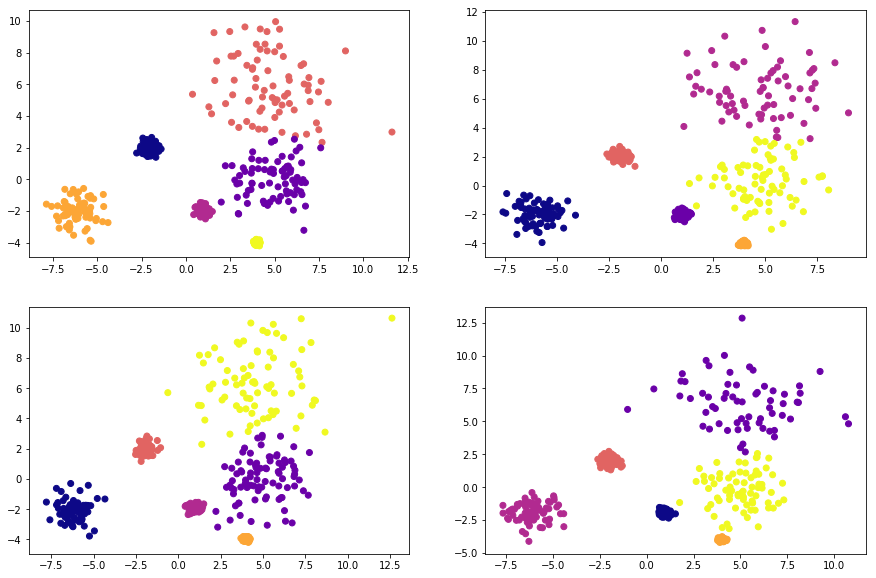

In [227]:
fig, a = plt.subplots(2, 2, figsize=(15, 10))
a[0][0].scatter(X1_subsamples[0, :, 0], X1_subsamples[0, :, 1], c=labels1_gmm_shuffled[0], cmap='plasma')
a[0][1].scatter(X1_subsamples[1, :, 0], X1_subsamples[1, :, 1], c=labels1_gmm_shuffled[1], cmap='plasma')
a[1][0].scatter(X1_subsamples[2, :, 0], X1_subsamples[2, :, 1], c=labels1_gmm_shuffled[2], cmap='plasma')
a[1][1].scatter(X1_subsamples[3, :, 0], X1_subsamples[3, :, 1], c=labels1_gmm_shuffled[3], cmap='plasma')
plt.show()

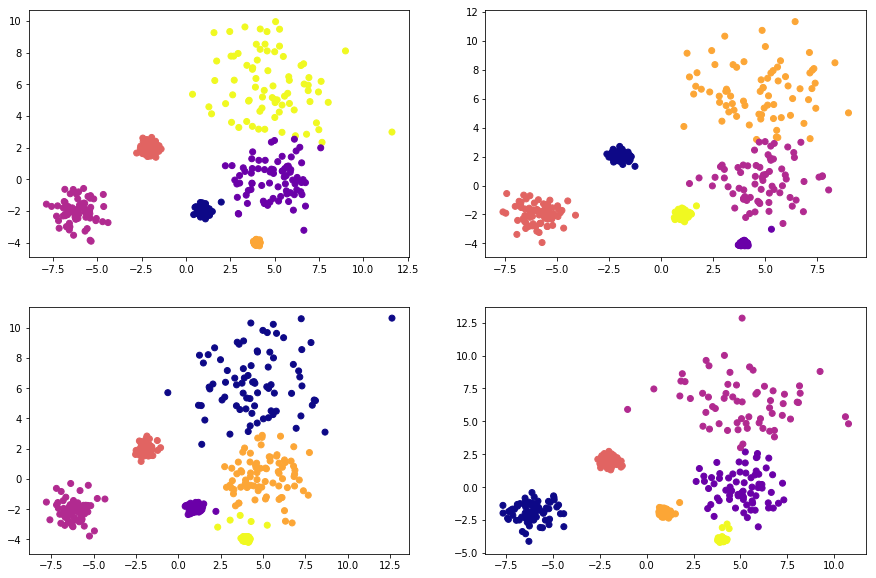

In [228]:
fig, a = plt.subplots(2, 2, figsize=(15, 10))
a[0][0].scatter(X1_subsamples[0, :, 0], X1_subsamples[0, :, 1], c=labels1_bgm_shuffled[0], cmap='plasma')
a[0][1].scatter(X1_subsamples[1, :, 0], X1_subsamples[1, :, 1], c=labels1_bgm_shuffled[1], cmap='plasma')
a[1][0].scatter(X1_subsamples[2, :, 0], X1_subsamples[2, :, 1], c=labels1_bgm_shuffled[2], cmap='plasma')
a[1][1].scatter(X1_subsamples[3, :, 0], X1_subsamples[3, :, 1], c=labels1_bgm_shuffled[3], cmap='plasma')
plt.show()

Розію'ємо на підвибірки другий датасет.

In [231]:
labels2_gmm_shuffled = []
labels2_bgm_shuffled = []
size_subsamples = 475
X2_subsamples = np.empty((4, size_subsamples, 2))

for i in range(4):
    X2_subsamples[i, :, :] = X2_shuffled[i*size_subsamples:i*size_subsamples + size_subsamples, :]
    labels2_gmm_shuffled.append(gmm2.fit(X2_subsamples[i, :, :]).predict(X2_subsamples[i, :, :]))
    labels2_bgm_shuffled.append(bgm2.fit(X2_subsamples[i, :, :]).predict(X2_subsamples[i, :, :]))

Як видно на нижченаведених графіках, моделі GaussianMixture та BayesianGaussianMixture на підвибірках другого датасету дали різні результати. Це пов'язано з тим, що кластери перетинаються між собою, тому для другого датасету ***розбиття не є стабільним на підвибірках даних.***

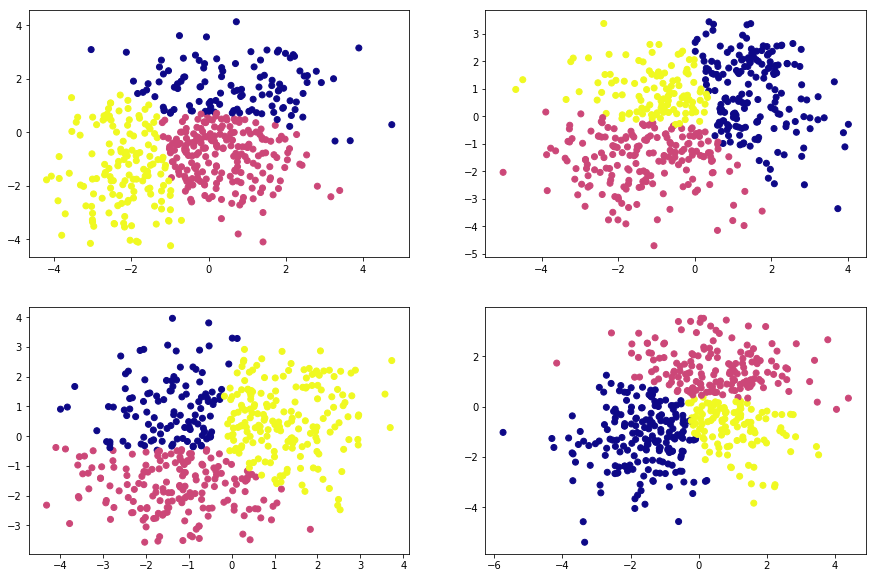

In [234]:
fig, a = plt.subplots(2, 2, figsize=(15, 10))
a[0][0].scatter(X2_subsamples[0, :, 0], X2_subsamples[0, :, 1], c=labels2_gmm_shuffled[0], cmap="plasma")
a[0][1].scatter(X2_subsamples[1, :, 0], X2_subsamples[1, :, 1], c=labels2_gmm_shuffled[1], cmap='plasma')
a[1][0].scatter(X2_subsamples[2, :, 0], X2_subsamples[2, :, 1], c=labels2_gmm_shuffled[2], cmap='plasma')
a[1][1].scatter(X2_subsamples[3, :, 0], X2_subsamples[3, :, 1], c=labels2_gmm_shuffled[3], cmap='plasma')
plt.show()

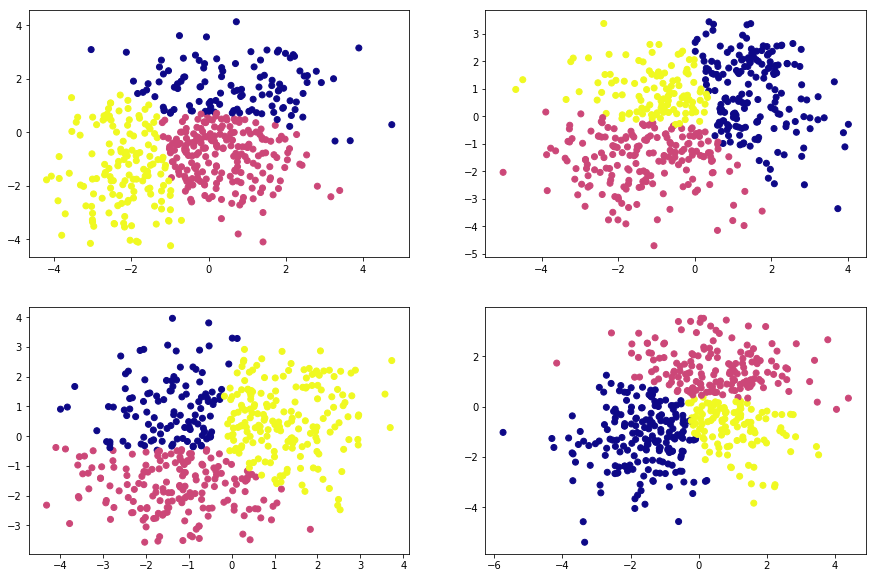

In [236]:
fig, a = plt.subplots(2, 2, figsize=(15, 10))
a[0][0].scatter(X2_subsamples[0, :, 0], X2_subsamples[0, :, 1], c=labels2_gmm_shuffled[0], cmap="plasma")
a[0][1].scatter(X2_subsamples[1, :, 0], X2_subsamples[1, :, 1], c=labels2_gmm_shuffled[1], cmap='plasma')
a[1][0].scatter(X2_subsamples[2, :, 0], X2_subsamples[2, :, 1], c=labels2_gmm_shuffled[2], cmap='plasma')
a[1][1].scatter(X2_subsamples[3, :, 0], X2_subsamples[3, :, 1], c=labels2_gmm_shuffled[3], cmap='plasma')
plt.show()

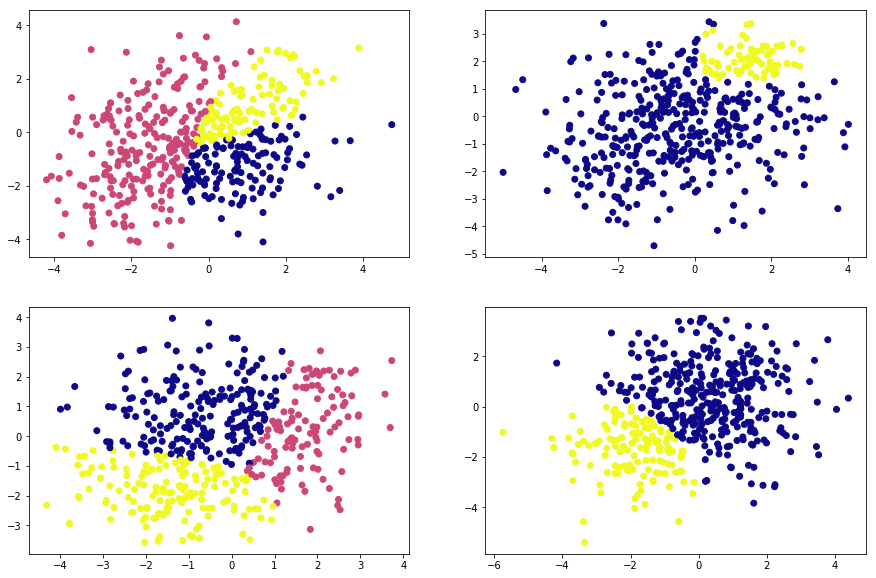

In [237]:
fig, a = plt.subplots(2, 2, figsize=(15, 10))
a[0][0].scatter(X2_subsamples[0, :, 0], X2_subsamples[0, :, 1], c=labels2_bgm_shuffled[0], cmap="plasma")
a[0][1].scatter(X2_subsamples[1, :, 0], X2_subsamples[1, :, 1], c=labels2_bgm_shuffled[1], cmap='plasma')
a[1][0].scatter(X2_subsamples[2, :, 0], X2_subsamples[2, :, 1], c=labels2_bgm_shuffled[2], cmap='plasma')
a[1][1].scatter(X2_subsamples[3, :, 0], X2_subsamples[3, :, 1], c=labels2_bgm_shuffled[3], cmap='plasma')
plt.show()

### 9. Зробити висновки про якість роботи моделей на досліджених даних. Дослідити різні значення параметрів основної моделі, різні функції відстані та різну кількість кластерів в алгоритмах, де кількість кластерів слугує параметром.

У попередніх пунктах були досліджені методи GaussianMixture та BayesianGaussianMixture на двох датасетах.   

**а) Перший датасет: всі кластери відокремлені**  
Для першого датасету обидва методи визначили досить точно кластери. Але це залежило від параметрів моделі. Так, для методу GaussianMixture варіювалося значення параметру `init_params`. Досліджувалися значення `random` та `kmeans`.  Як і зазначалося вище, алгоритм `kmeans` добре працює для відокремлених кластерів. Графіки з відповідними результатами це підтвердили. Кількість кластерів у результаті була однакова з кількістю кластерів, яка вказувалася у параметрах. Це один з його недоліків: він завжди використовуватиме всі компоненти, до яких він має доступ, потребуючи даних, які розбиті на навчальні та тестові набори, або теоретичних критеріїв інформації, щоб визначити, скільки компонентів використовувати за відсутності зовнішніх підказок.  
У методі BayesianGaussianMixture зміна різних параметрів не позначилася на якості результать: точність залишилася високою. При змінні кількості компонент можна було побачити перевагу цього методу - модель автоматично вибирає відповідну кількість ефективних компонентів.

**б) Другий датасет: кластери перекриваються один одного**   
За допомгою графіків та метрик якості стало очевидно, що метод GaussianMixture неправильно визначає кластери при різних параметрах. Метод BayesianGaussianMixture має вищий показник точності (але він менше 50%, що не вважається ефективним). На цьому датасеті можна було побачити недолік методу BayesianGaussianMixture - він працював повільніше, ніж GaussianMixture (це поясняюється більшою кількістю параметрів).

### 10. Оцінити результати кластеризації на основі метрик якості та на основі неформальних методів. Для кожного набору даних вибрати найкращу модель.

Для першого датасету добре спрацювали обидва методи. Це видно на метриках якості (96-97%), а також на підвибірках (розбиття є стабільним). Але перевага методу GaussianMixture на BayesianGaussianMixture є швидкість. Оскільки результат вони дають однаковий, але перший метод швидше, то **для першого датасету найкраща буде модель методу GaussianMixture**.  

Для другого датасету **краща модель однозначно є методу BayesianGaussianMixture**, оскільки метрики якості більше в неї. Але розбиття на підвибірки не є стабільним в обох методах.